In [1]:
import os
os.chdir('..')
import graphs
import ep_utils
from time import perf_counter as pc
import networkx as nx
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import profile
import pstats

In [2]:
def DuelOfMethods(size):
    """compares networkx's normal eigenvalue catching method to our method
    PARAMETERS:
        size (int): how big of graph you want to compare with
    RETURNS:
        our_time (float): how long our method took
        their_time (float): how long their method took
        accurate (bool): if we matched their spectrum
    """
    bertha = graphs.GenBertha(size)

    # normal method
    start = pc()
    their_spec = nx.adjacency_spectrum(bertha)
    end = pc()
    their_time = end-start

    # our method
    start = pc()
    our_spec = ep_utils.GetSpectrumFromLEPs(bertha)
    end = pc()
    our_time = end-start
    
    # check if our spectrums are the same
    accurate = Counter(np.round(np.array(our_spec),2)) == Counter(np.round(their_spec,2))
    
    return our_time, their_time, accurate
    

In [3]:
#DuelOfMethods(1000)

In [4]:
size_list = [2**i for i in range(3,13)]
our_times = []
their_times = []
acc_count = []

progress_bar = tqdm(size_list,total=len(size_list))

for size in progress_bar:
    print(size)
    us, them, acc = DuelOfMethods(size)
    our_times.append(us)
    their_times.append(them)
    acc_count.append(acc)
    progress_bar.update()

  0%|                                                    | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/site-packages/networkx/linalg/spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())


8


 50%|██████████████████████                      | 5/10 [00:01<00:00,  5.32it/s]

16
32
64
128


 90%|███████████████████████████████████████▌    | 9/10 [00:01<00:00,  8.95it/s]

256
512
1024


12it [00:05,  1.81it/s]                                                         

2048


16it [00:15,  1.42s/it]

4096


100%|███████████████████████████████████████████| 10/10 [01:09<00:00,  6.97s/it]


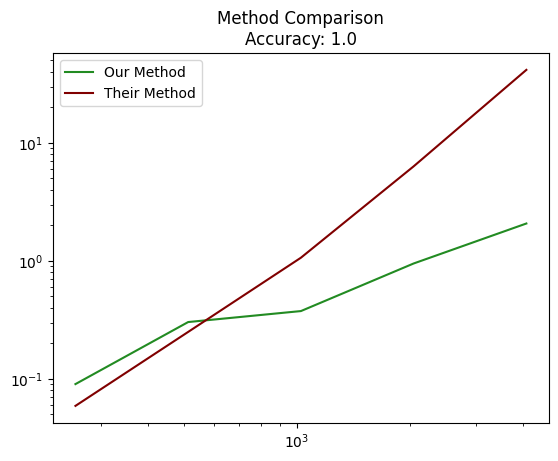

In [10]:
piece = 100
plt.loglog(size_list[5:piece],our_times[5:piece],'-',color='forestgreen',label="Our Method")
plt.loglog(size_list[5:piece],their_times[5:piece],'-',color='maroon',label='Their Method')
plt.title(f"Method Comparison\nAccuracy: {np.sum(acc_count)/len(acc_count)}")
plt.legend()
plt.show()

In [6]:
#bertha = graphs.GenBertha(1000)
#profile.run("ep_utils.GetSpectrumFromLEPs(bertha)")

In [7]:
profile.run("ep_utils.GetSpectrumFromLEPs(bertha)")

TypeError: run() got an unexpected keyword argument 'silent'